In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets
def get_iris_df():
    ds = sklearn.datasets.load_iris()
    df = pd.DataFrame(ds['data'],
    columns = ds['feature_names'])
    code_species_map = dict(zip(
    range(3), ds['target_names']))
    df['species'] = [code_species_map[c] for c in ds['target']]
    return df
    
df = get_iris_df()

Caught Type Error


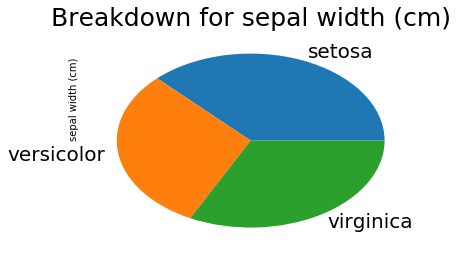

In [19]:
#pie charts 1
sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='pie', fontsize=20)
plt.ylabel(var, horizontalalignment='left')
try:
    plt.title('Breakdown for ' + var, fontsize=25)
    plt.savefig('iris_pie_for_one_variable.jpg')
    plt.close() # gives warning but generates plott at end
except TypeError:
    print('Caught Type Error')

Caught Type Error


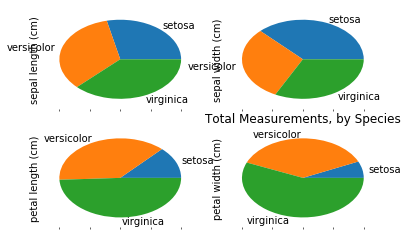

In [20]:
# pie charts 2 
sums_by_species = df.groupby('species').sum()
sums_by_species.plot(kind='pie', subplots=True,
layout=(2,2), legend=False)
try:
    plt.title('Total Measurements, by Species')
    plt.savefig('iris_pie_for_each_variable.jpg')
    plt.close()     
except TypeError:
    print('Caught Type Error')

Caught Type Error
 error


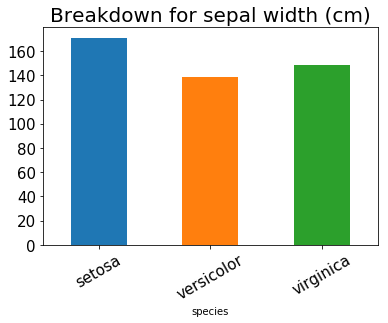

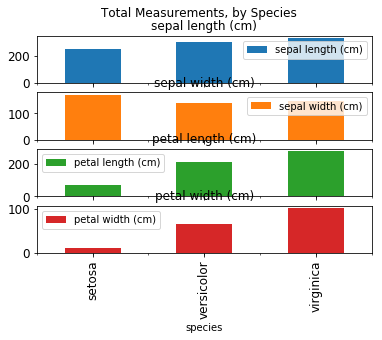

In [23]:
# bar plots

sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='bar', fontsize=15,
rot=30)

try:
    plt.title('Breakdown for ' + var, fontsize=20)
    plt.savefig('iris_bar_for_one_variable.jpg')
    plt.close()
except TypeError:
    print('Caught Type Error')
    
sums_by_species = df.groupby('species').sum()
sums_by_species.plot(
kind='bar', subplots=True, fontsize=12)
try:
    plt.suptitle('Total Measurements, by Species')
    plt.savefig('iris_bar_for_each_variable.jpg')
    plt.close()
except TypeError:
    print(' error')
    

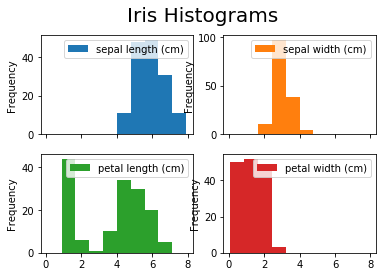

In [24]:
# histograms 1
df.plot(kind='hist', subplots=True, layout=(2,2))
plt.suptitle('Iris Histograms', fontsize=20)
plt.show()

Caught Type Error


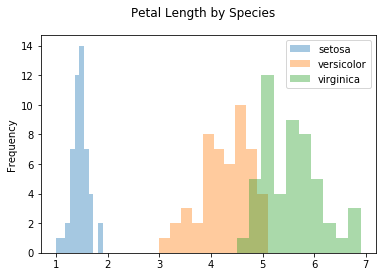

In [25]:
# histograms 2 
for spec in df['species'].unique():
    forspec = df[df['species']==spec]
    forspec['petal length (cm)'].plot(
        kind='hist', alpha=0.4, label=spec)
try:
    plt.legend(loc='upper right')
    plt.suptitle('Petal Length by Species')
    plt.savefig('iris_hist_by_spec.jpg')
except TypeError:
    print('Caught Type Error')

In [55]:
# quantile, mean, avg , median, std deviation
col = df['petal length (cm)']
Average = col.mean()
Std = col.std()
Median = col.quantile(0.5)
Perc25 = col.quantile(0.25)
Perc75 = col.quantile(0.75)
Clean_Avg = col[(col>Perc25)&(col<Perc75)].mean()

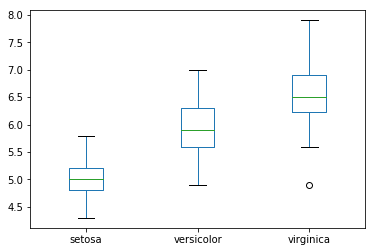

In [73]:
# box plot 
col = 'sepal length (cm)'
df['ind'] = pd.Series(df.index).apply(lambda i: i% 50)
df.pivot('ind','species')[col].plot(kind='box')
plt.show()

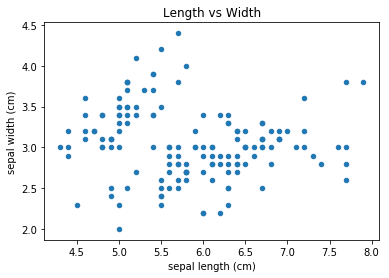

In [72]:
# scatter plots 
df.plot(kind="scatter",
x="sepal length (cm)", y="sepal width (cm)")
plt.title("Length vs Width")
plt.show()

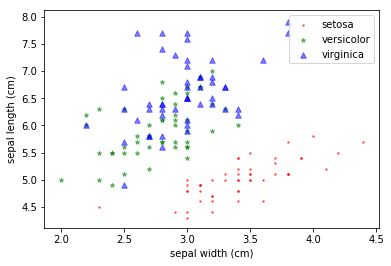

In [58]:
# scatter plots 
plt.close()
colors = ["r", "g", "b"]
markers= [".", "*", "^"]
fig, ax = plt.subplots(1, 1)
for i, spec in enumerate(df['species'].unique() ):
    ddf = df[df['species']==spec]
    ddf.plot(kind="scatter",
    x="sepal width (cm)", y="sepal length (cm)",
    alpha=0.5, s=10*(i+1), ax=ax,
    color=colors[i], marker=markers[i], label=spec)
plt.legend()
plt.show()

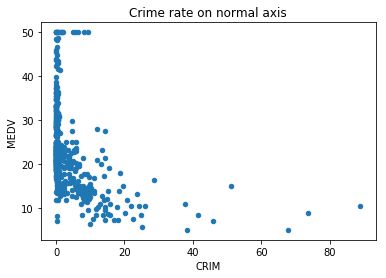

In [59]:
# scatter plot with log axes 1 
import pandas as pd
import sklearn.datasets as ds
import matplotlib.pyplot as plt
# Make Pandas dataframe
bs = ds.load_boston()
df = pd.DataFrame(bs.data, columns=bs.feature_names)
df['MEDV'] = bs.target
# Normal Scatterplot
df.plot(x='CRIM',y='MEDV',kind='scatter')
plt.title('Crime rate on normal axis')
plt.show()

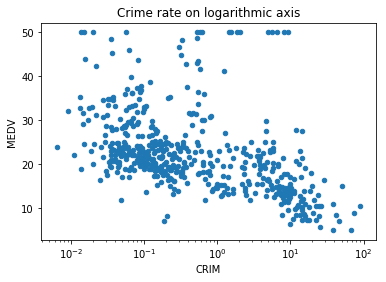

In [60]:
# scatter plot with log axes 2abs 
df.plot(x='CRIM',y='MEDV',kind='scatter',logx=True)
plt.title('Crime rate on logarithmic axis')
plt.show()

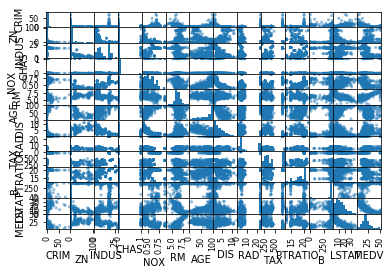

In [64]:
plt.close()
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

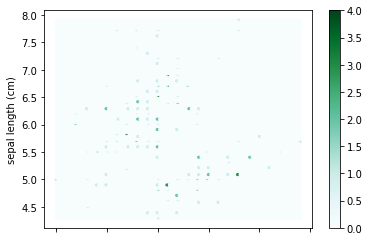

In [71]:
plt.close()
df.plot(kind = "hexbin",x="sepal width (cm)", y="sepal length (cm)")
plt.show()

In [74]:
df["sepal width (cm)"].corr(df["sepal length (cm)"]) # Pearson corr

-0.10936924995064938

In [75]:
df["sepal width (cm)"].corr(df["sepal length (cm)"], method="pearson")

-0.10936924995064938

In [77]:
df["sepal width (cm)"].corr(df["sepal length (cm)"], method="spearman")

-0.15945651848582867

In [79]:
df["sepal width (cm)"].corr(df["sepal length (cm)"], method="spearman")

-0.15945651848582867

/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


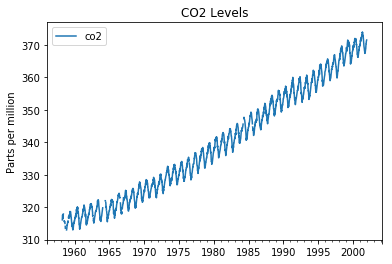

In [81]:
import statsmodels.api as sm
dta = sm.datasets.co2.load_pandas().data
dta.plot()
plt.title("CO2 Levels")
plt.ylabel("Parts per million")
plt.show()

/usr/local/lib/python3.5/dist-packages/pandas/core/internals.py:3462: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


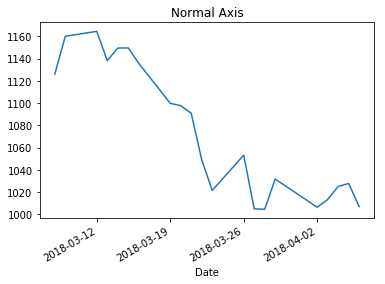

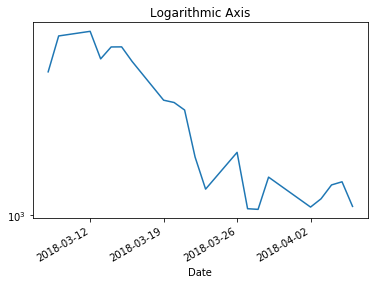

In [9]:
import urllib.request
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Get raw CSV data from the web
URL = ("https://finance.yahoo.com/quote/GOOG/history?p=GOOG")
#URL = ("http://ichart.finance.yahoo.com/" + "table.csv?s=GOOG&c=2000")
#dat = urllib.request.urlopen(URL)
#dat = dat.read()
#print(dat)
#open('foo.csv','wb').write(dat)
df = pd.read_csv('GOOG.csv')
df.index = df['Date'].astype('datetime64')
df['LogClose'] = np.log(df['Close'])
df['Close'].plot()
plt.title("Normal Axis")
plt.show()
df['Close'].plot(logy=True)
plt.title("Logarithmic Axis")
plt.show()